In [2]:
# All includes

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Current best:
# Decision Tree: 99/91%


## Current Best for SVM: no frequency features
# window_size: 12
# Stridee: 5
# Overall Accuracy: 90/90


# if frequency involved --> achieve 91/89 accuracy

In [3]:
# Import data

df = pd.read_excel('data.xlsx')

df = df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

#df.head()

In [4]:
# Prepare data

#df.columns

Feeding = df[['Feeding', 'Unnamed: 1', 'Unnamed: 2']]
Feeding = Feeding.dropna()
Feeding.index = pd.RangeIndex(len(Feeding.index))
Feeding = Feeding.drop(0)

Lying = df[['Lying', 'Unnamed: 4', 'Unnamed: 5']]
Lying = Lying.dropna()
Lying.index = pd.RangeIndex(len(Lying.index))
Lying = Lying.drop(0)

Standing = df[['Standing', 'Unnamed: 7', 'Unnamed: 8']]
Standing = Standing.dropna()
Standing.index = pd.RangeIndex(len(Standing.index))
Standing = Standing.drop(0)

Lying_down = df[['Lying down', 'Unnamed: 10', 'Unnamed: 11']]
Lying_down = Lying_down.dropna()
Lying_down.index = pd.RangeIndex(len(Lying_down.index))
Lying_down = Lying_down.drop(0)

Standing_up = df[['Standing up', 'Unnamed: 13', 'Unnamed: 14']]
Standing_up = Standing_up.dropna()
Standing_up.index = pd.RangeIndex(len(Standing_up.index))
Standing_up = Standing_up.drop(0)

Normal_walking = df[['Normal walking', 'Unnamed: 16', 'Unnamed: 17']]
Normal_walking = Normal_walking.dropna()
Normal_walking.index = pd.RangeIndex(len(Normal_walking.index))
Normal_walking = Normal_walking.drop(0)

Active_walking = df[['Active walking', 'Unnamed: 19', 'Unnamed: 20']]
Active_walking = Active_walking.dropna()
Active_walking.index = pd.RangeIndex(len(Active_walking.index))
Active_walking = Active_walking.drop(0)

#Active_walking.columns

In [5]:
print('1.feeding: ', len(Feeding)/6)
print('2.lying: ', len(Lying)/6)
print('3.standing: ', len(Standing)/6)
print('4.lying_down: ', len(Lying_down)/6)
print('5.standing_up: ', len(Standing_up)/6)
print('6.normal_walking: ', len(Normal_walking)/6 )
print('7.active_walking: ', len(Active_walking)/6 )

1.feeding:  614.0
2.lying:  732.0
3.standing:  452.0
4.lying_down:  327.0
5.standing_up:  304.0
6.normal_walking:  739.0
7.active_walking:  517.0


In [6]:
import matplotlib.pyplot as plt


In [7]:
sample_feeding_x = Feeding['Feeding']
sample_feeding_y = Feeding['Unnamed: 1']
sample_feeding_z = Feeding['Unnamed: 2']
sample_lying_x = Lying['Lying']
sample_lying_y = Lying['Unnamed: 4']
sample_lying_z = Lying['Unnamed: 5']
sample_lyingdown_x = Lying_down['Lying down']
sample_lyingdown_y = Lying_down['Unnamed: 10']
sample_lyingdown_z = Lying_down['Unnamed: 11']
sample_standing_x = Standing['Standing']
sample_standing_y = Standing['Unnamed: 7']
sample_standing_z = Standing['Unnamed: 8']
sample_standingup_x = Standing_up['Standing up']
sample_standingup_y = Standing_up['Unnamed: 13']
sample_standingup_z = Standing_up['Unnamed: 14']
sample_normalw_x = Normal_walking['Normal walking']
sample_normalw_y = Normal_walking['Unnamed: 16']
sample_normalw_z = Normal_walking['Unnamed: 17']
sample_activew_x = Active_walking['Active walking']
sample_activew_y = Active_walking['Unnamed: 19']
sample_activew_z = Active_walking['Unnamed: 20']

feed_x = sample_feeding_x[1:18]
feed_y = sample_feeding_y[1:18]
feed_z = sample_feeding_z[1:18]

ly_x = sample_lying_x[1:18]
ly_y = sample_lying_y[1:18]
ly_z = sample_lying_z[1:18]

lydown_x = sample_lyingdown_x[1:18]
lydown_y = sample_lyingdown_y[1:18]
lydown_z = sample_lyingdown_z[1:18]

stand_x = sample_standing_x[1:18]
stand_y = sample_standing_y[1:18]
stand_z = sample_standing_z[1:18]

standup_x = sample_standingup_x[1:18]
standup_y = sample_standingup_y[1:18]
standup_z = sample_standingup_z[1:18]

active_x = sample_activew_x[1:18]
active_y = sample_activew_y[1:18]
active_z = sample_activew_z[1:18]


normal_x = sample_normalw_x[1:18]
normal_y = sample_normalw_y[1:18]
normal_z = sample_normalw_z[1:18]



Text(0.5, 1.0, 'FEEDING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LYING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'STANDING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LYING DOWN')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'STANDING UP')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'NORMAL WALKING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'ACTIVE WALKING')

Text(0, 0.5, 'COUNTS')

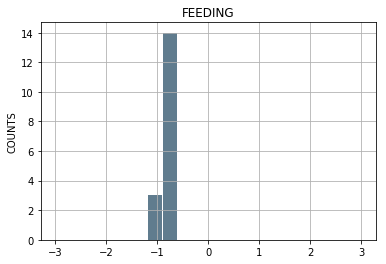

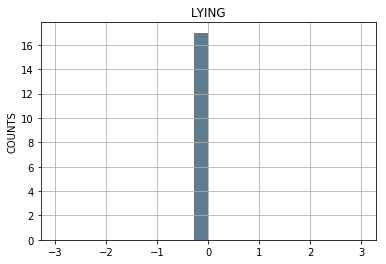

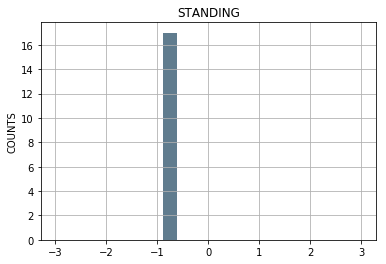

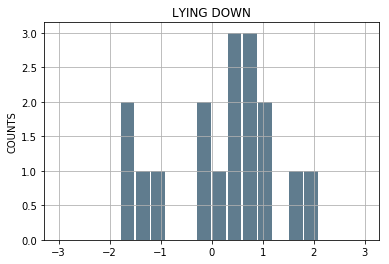

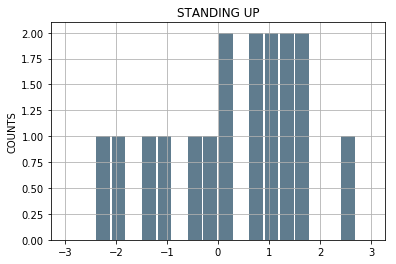

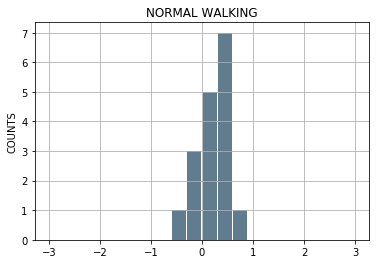

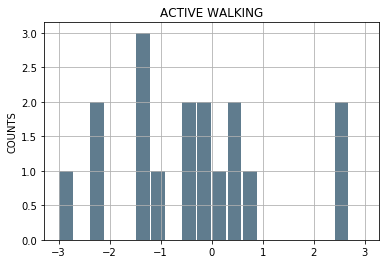

In [9]:
# histogram
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

#axes[0, 0].hist(feed_x)

feed_x.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('FEEDING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)


plt.figure(2)
ly_x.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('LYING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(3)
stand_x.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('STANDING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(4)
lydown_x.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('LYING DOWN')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(5)
standup_x.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('STANDING UP')
plt.ylabel('COUNTS')
plt.grid(axis='y', alpha=2)


plt.figure(6)
normal_x.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('NORMAL WALKING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(7)
active_x.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('ACTIVE WALKING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

Text(0.5, 1.0, 'FEEDING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LYING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'STANDING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LYING DOWN')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'STANDING UP')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'NORMAL WALKING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'ACTIVE WALKING')

Text(0, 0.5, 'COUNTS')

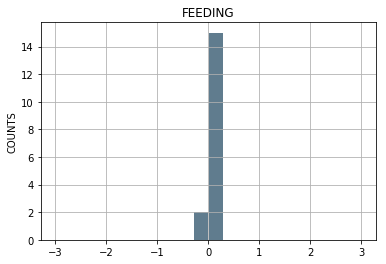

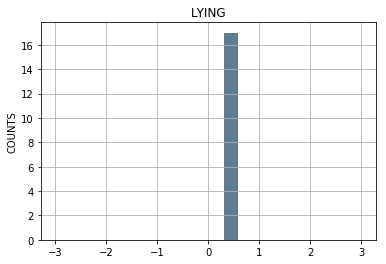

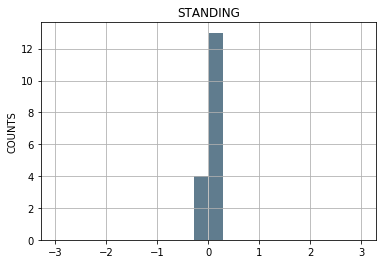

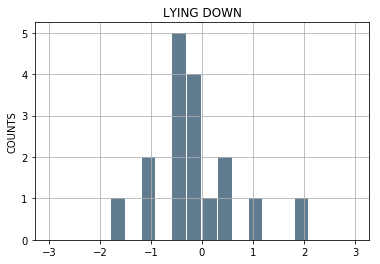

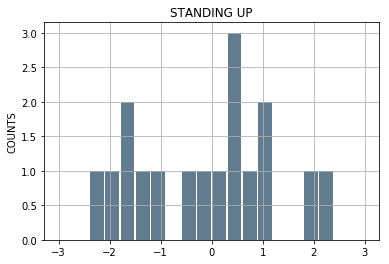

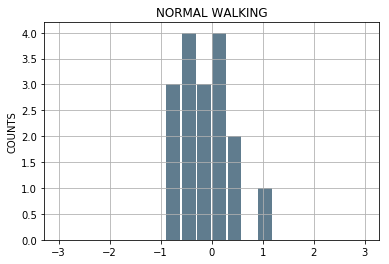

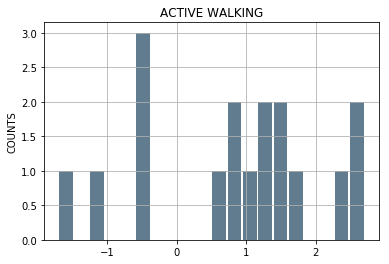

In [11]:
#axes[0, 0].hist(feed_x)
# y-axis

feed_y.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('FEEDING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)


plt.figure(2)
ly_y.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('LYING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(3)
stand_y.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('STANDING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(4)
lydown_y.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('LYING DOWN')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(5)
standup_y.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('STANDING UP')
plt.ylabel('COUNTS')
plt.grid(axis='y', alpha=2)


plt.figure(6)
normal_y.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('NORMAL WALKING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(7)
active_y.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('ACTIVE WALKING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

Text(0.5, 1.0, 'FEEDING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LYING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'STANDING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LYING DOWN')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'STANDING UP')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'NORMAL WALKING')

Text(0, 0.5, 'COUNTS')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'ACTIVE WALKING')

Text(0, 0.5, 'COUNTS')

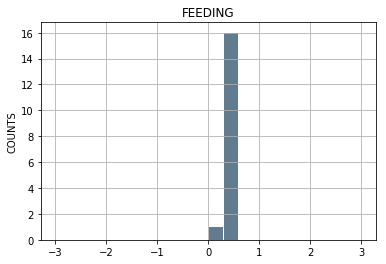

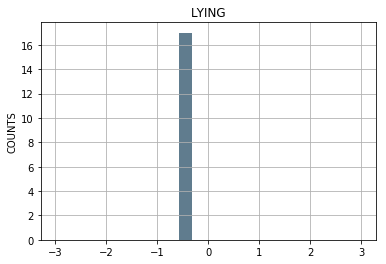

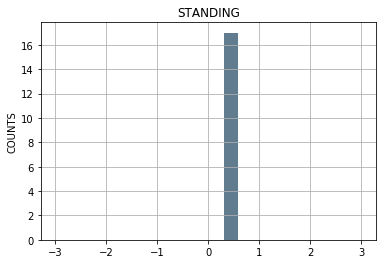

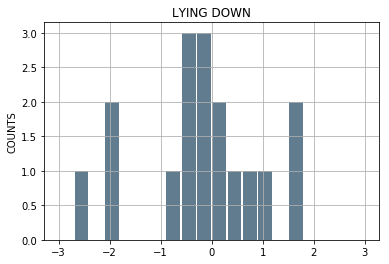

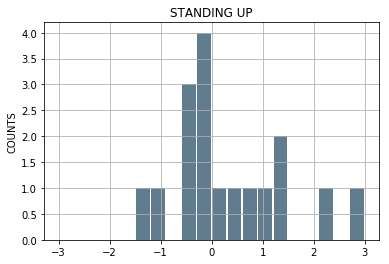

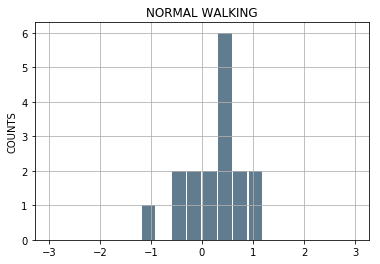

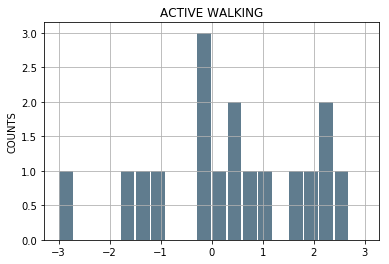

In [14]:
#axes[0, 0].hist(feed_x)
# Z - dimension

feed_z.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('FEEDING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)


plt.figure(2)
ly_z.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('LYING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(3)
stand_z.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('STANDING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(4)
lydown_z.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('LYING DOWN')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(5)
standup_z.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('STANDING UP')
plt.ylabel('COUNTS')
plt.grid(axis='y', alpha=2)


plt.figure(6)
normal_z.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('NORMAL WALKING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

plt.figure(7)
active_z.plot.hist(grid=True, bins=20, range=[-3, 3], rwidth=0.9,
                   color='#607c8e')
plt.title('ACTIVE WALKING')
plt.ylabel('COUNTS')
#plt.grid(axis='y', alpha=0.75)

In [121]:
len(features_vector)



22033

In [ ]:
y_data